In [1]:
cd /orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001/object

/orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001/object


In [2]:
files = !ls *fits

In [3]:
len(files)

234

In [44]:
files[115]

'0002613942-20200712-EMIR-DITHERED_IMAGE-frame.fits'

In [45]:
from astropy.io import fits

In [46]:
filehandle = fits.open(files[115])

In [47]:
filehandle

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2add78849940>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2add787e27f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2add78965160>]

In [48]:
from astropy.wcs import WCS

In [49]:
filehandle[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2313 / length of data axis 1                          
NAXIS2  =                 2310 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DETVER  = 'SCI     '           / 401 Detector used: science or engineering      
NSEC    =                    1 / 402 Number of sequences executed at detector   
NRST    =                    1 / 403 Number of resets                           
OPTRST  =                    3 / 404 Type of reset                              
NIMGRST =                   

In [50]:
filehandle[0].header['FILTER']

'J'

In [51]:
ww = WCS(filehandle[0].header)

In [52]:
%matplotlib inline
import pylab as pl
from astropy import visualization
pl.style.use('dark_background')

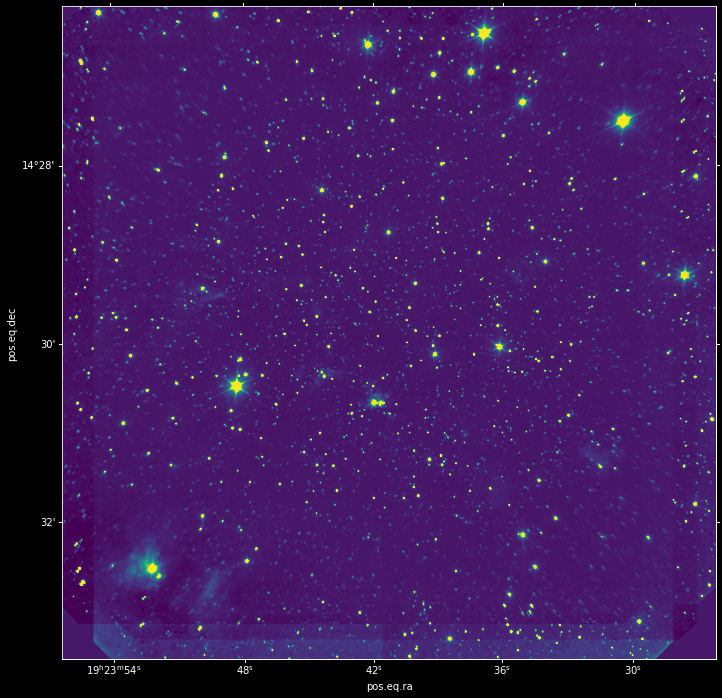

In [53]:
# https://docs.astropy.org/en/stable/visualization/wcsaxes/
pl.figure(figsize=(12,12))
pl.subplot(projection=ww) # this line makes the image show up with RA/Dec coordinates
pl.imshow(filehandle[0].data,
          norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99.5))

In [54]:
from astroquery.vizier import Vizier
from astropy import coordinates, units as u

In [55]:
# cx, cy are 1024
cy, cx = (x/2 for x in filehandle[0].data.shape)
cx, cy

(1156.5, 1155.0)

In [56]:
ra, dec = ww.wcs_pix2world(cx, cy, 0)*u.deg
ra, dec

(<Quantity 290.92192365 deg>, <Quantity 14.49767813 deg>)

In [57]:
center = coordinates.SkyCoord(ra, dec, frame='fk5')
center

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (290.92192365, 14.49767813)>

In [58]:
tables = Vizier(row_limit=10000).query_region(center, radius=5*u.arcmin, catalog='2MASS')
tables

TableList with 2 tables:
	'0:II/246/out' with 15 column(s) and 1717 row(s) 
	'1:VII/233/xsc' with 13 column(s) and 12 row(s) 

In [59]:
table = tables[0]

In [60]:
table.meta

{'ID': 'II_246_out',
 'name': 'II/246/out',
 'description': '2MASS Point Source Catalogue, output (on a total of 470,992,970 sources)'}

In [62]:
table

<Table length=1717>
 RAJ2000    DEJ2000        _2MASS        Jmag  ...  Bflg   Cflg   Xflg  Aflg
   deg        deg                        mag   ...                          
 float64    float64       bytes17      float32 ... bytes3 bytes3 uint8 uint8
---------- ---------- ---------------- ------- ... ------ ------ ----- -----
290.865386  14.437401 19232769+1426146  14.864 ...    111    000     0     0
290.872864  14.436471 19232948+1426112  17.823 ...    011    000     0     0
290.873401  14.431552 19232961+1425535  16.439 ...    001    000     0     0
290.874978  14.435305 19232999+1426070  14.476 ...    111    00c     0     0
290.872652  14.434007 19232943+1426024  14.130 ...    111    000     0     0
290.867867  14.436468 19232828+1426112  16.111 ...    111    000     0     0
290.868389  14.434249 19232841+1426032  16.438 ...    110    000     0     0
290.869987  14.432382 19232879+1425565  14.996 ...    120    0c0     0     0
290.871244  14.432346 19232909+1425564  15.601 ...    120    cc0     0     0
       ...        ...              ...     ... ...    ...    ...   ...   ...
290.957510  14.572262 19234980+1434201  15.262 ...    111    000     2     0
290.945396  14.577816 19234689+1434401  16.633 ...    101    00c     0     0
290.945663  14.576488 19234695+1434353  17.823 ...    002    00c     0     0
290.964355  14.563428 19235144+1433483  16.265 ...    100    000     2     0
290.944435  14.570038 19234666+1434121  14.390 ...    001    000     2     0
290.945127  14.575444 19234683+1434315  17.838 ...    002    00c     0     0
290.942100  14.573568 19234610+1434248  15.961 ...    111    000     0     0
290.944102  14.570338 19234658+1434132  14.389 ...    110    000     2     0
290.950200  14.565629 19234804+1433562  16.001 ...    110    000     2     0
290.949962  14.564198 19234799+1433511  16.505 ...    100    000     2     0

In [63]:
table_coordinates = coordinates.SkyCoord(table['RAJ2000'], table['DEJ2000'], frame='fk5')

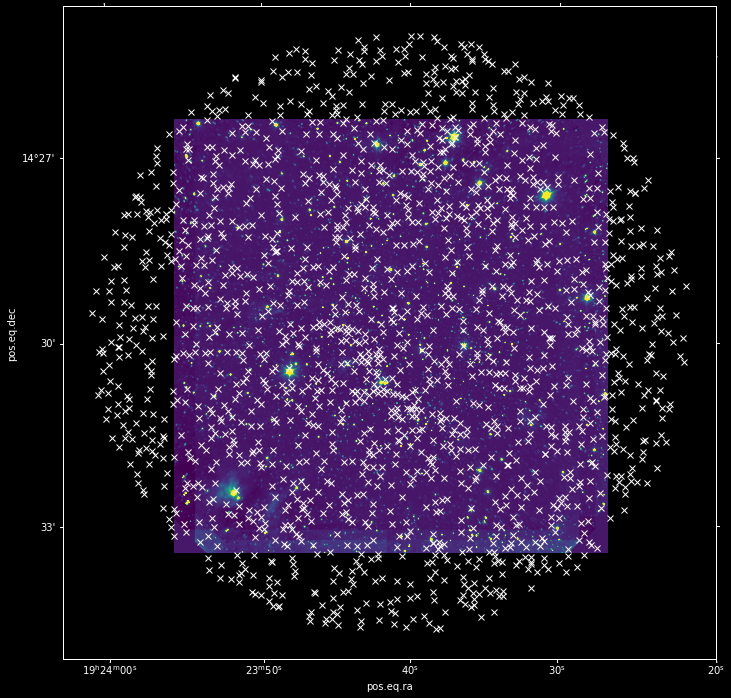

In [64]:
pl.figure(figsize=(12,12))
ax = pl.subplot(projection=ww)
pl.imshow(filehandle[0].data, norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99.5))
pl.plot(table_coordinates.ra, table_coordinates.dec, transform=ax.get_transform('world'), marker='x', color='w', linestyle='none')

(-0.5, 2312.5, -0.5, 2309.5)

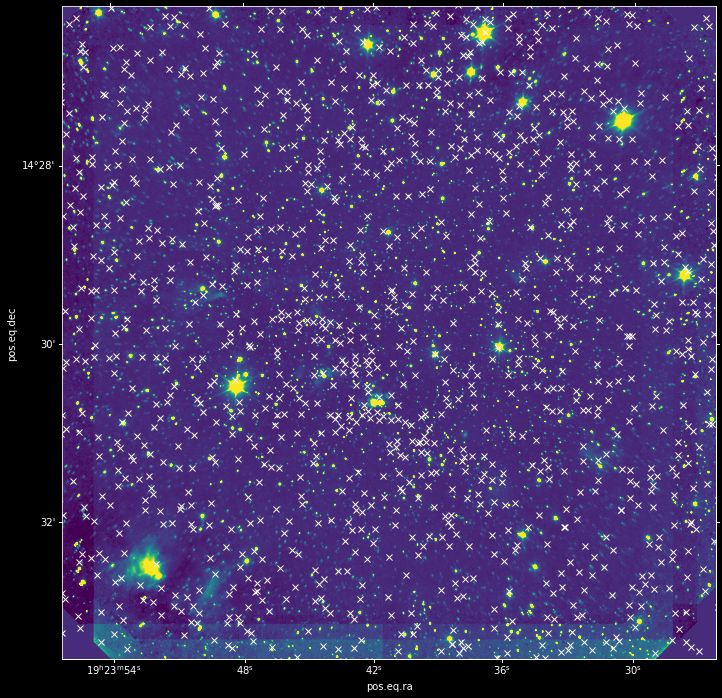

In [65]:
pl.figure(figsize=(12,12))
ax = pl.subplot(projection=ww)
pl.imshow(filehandle[0].data, norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99))
axlims = ax.axis()
pl.plot(table_coordinates.ra, table_coordinates.dec, transform=ax.get_transform('world'), marker='x', color='w', linestyle='none')
ax.axis(axlims)

In [66]:
brightstars = table['Jmag'] < 12
brightstars.sum()

40

(-0.5, 2312.5, -0.5, 2309.5)

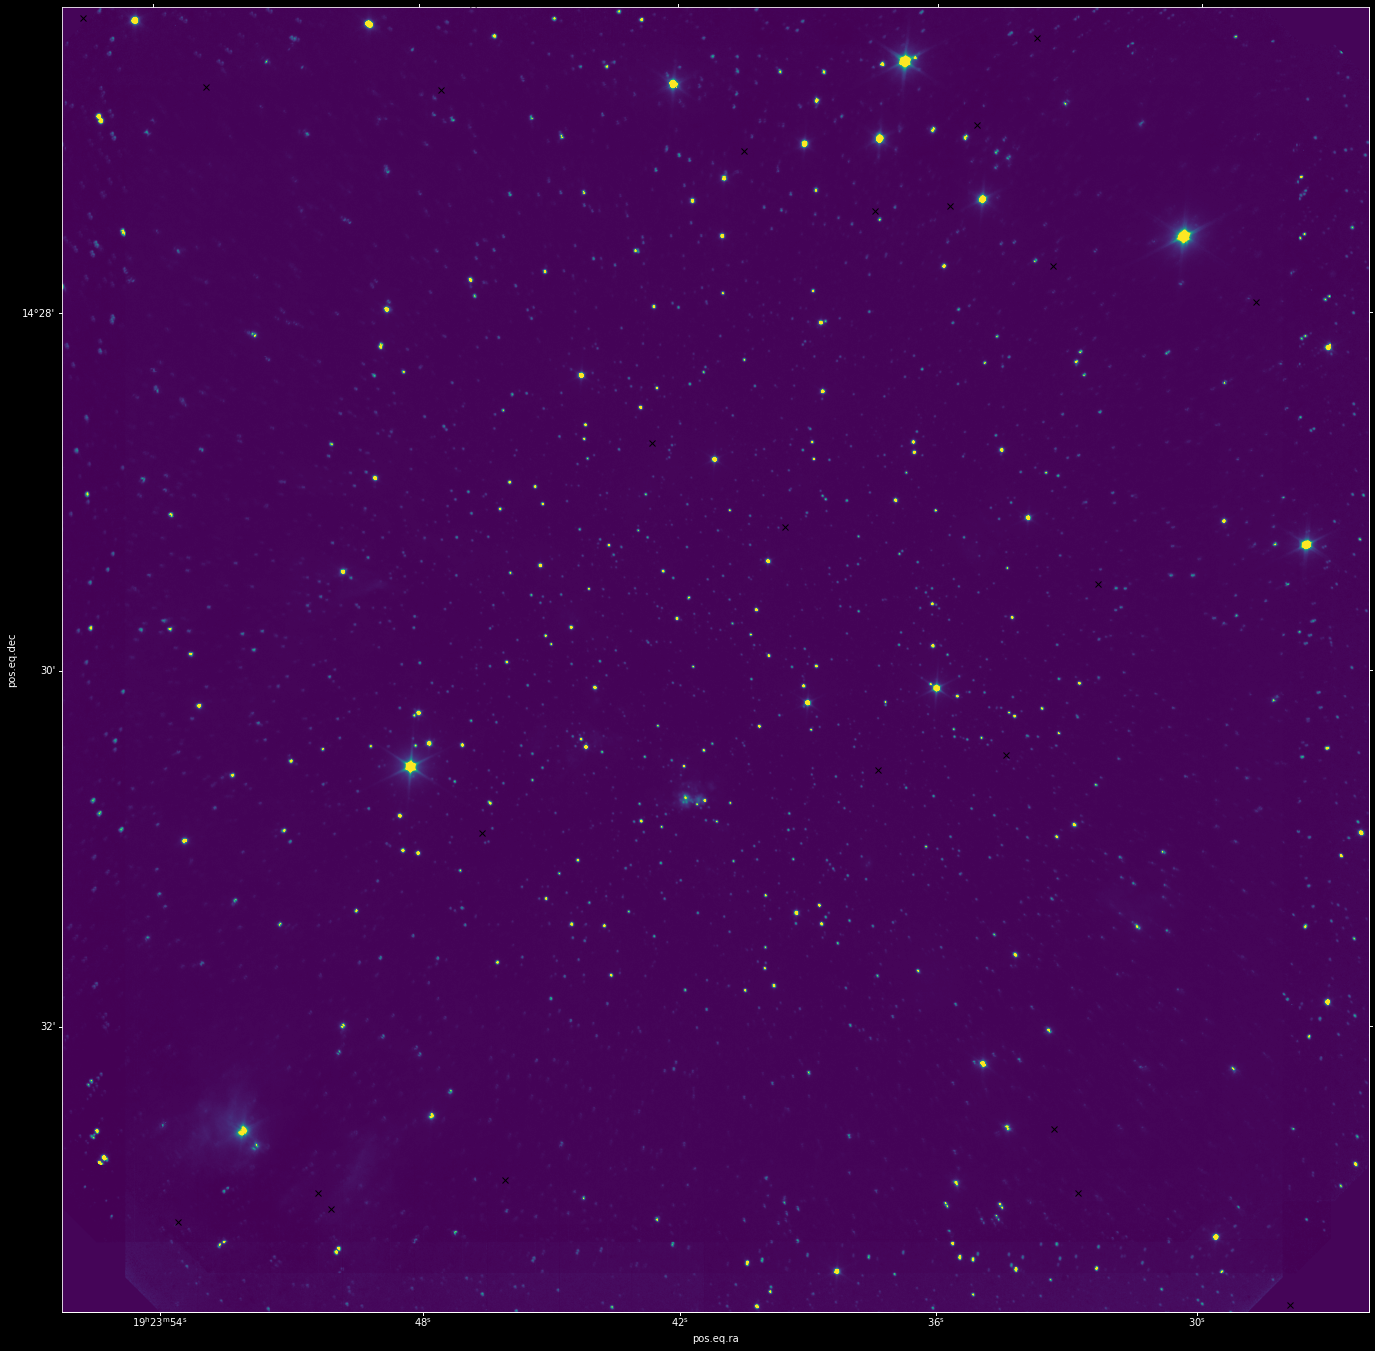

In [67]:
# because the offset was so bad, I decided to try to fix the WCS a little before doing cross-matching
# the code below re-loads the WCS, then shifts it up by 4" and left by 1.8"
ww = WCS(filehandle[0].header)
ww.wcs.crval[1] += 4/3600
ww.wcs.crval[0] -= 1.8/3600


pl.figure(figsize=(24,24))
ax = pl.subplot(projection=ww)
pl.imshow(filehandle[0].data, norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99.9))
axlims = ax.axis()
pl.plot(table_coordinates.ra[brightstars],
        table_coordinates.dec[brightstars],
        transform=ax.get_transform('world'), marker='x', color='k', linestyle='none')
ax.axis(axlims)

In [68]:
from photutils import DAOStarFinder
std = filehandle[0].data.std() # crummy guess!!
daofind = DAOStarFinder(fwhm=3.0, threshold=4.*std)

In [69]:
import numpy as np
starcat = daofind(filehandle[0].data - np.median(filehandle[0].data)) 

In [70]:
starcat

<Table length=393>
  id      xcentroid      ...        flux                mag         
int64      float64       ...      float64             float64       
----- ------------------ ... ------------------ --------------------
    1  972.9591833968612 ... 1.3242501673579263 -0.30492509123377454
    2 1229.3901226648265 ... 10.179854746383683   -2.519353953033751
    3 1611.9885296291768 ... 2.3011749768203256   -0.904874107056587
    4 1252.9481587464638 ... 3.0324530247839756  -1.2044852050212012
    5 1945.4750259027437 ... 1.1017337524126078 -0.10519163640604046
    6 1749.0125449738641 ... 1.3740534921956484  -0.3450091005737274
    7 1473.0321671411216 ... 1.4117110505113155  -0.3743645356807678
    8 1371.1315574500507 ... 10.688839132806077   -2.572326352453016
    9 2051.5276730595338 ...  1.730583910960403  -0.5954816545298235
   10 2052.5064487597756 ... 1.3636183379955993  -0.3367320825155334
  ...                ... ...                ...                  ...
  384  539.7912012919717 ...  3.260880393999558  -1.2833371739708759
  385  543.2210303989332 ...   4.38737584833276  -1.6055121005240909
  386  548.5103350965755 ... 2.8816596113982755   -1.149106698982885
  387  129.1309735282281 ...  7.470007356339771  -2.1833025737540916
  388  543.1482691022039 ...  6.013382177920891  -1.9477970153046318
  389 126.91329313029111 ...   8.05337809571997   -2.264945222842874
  390 1026.0702649867585 ...  2.561422954088999   -1.021203242793995
  391 129.69289900844973 ...  9.335784586912927    -2.42537705569891
  392  871.1796236351612 ... 1.7475866292102307   -0.606096783155126
  393   985.641361512932 ... 1.4740637627048703  -0.4212906748726156

(-0.5, 2312.5, -0.5, 2309.5)

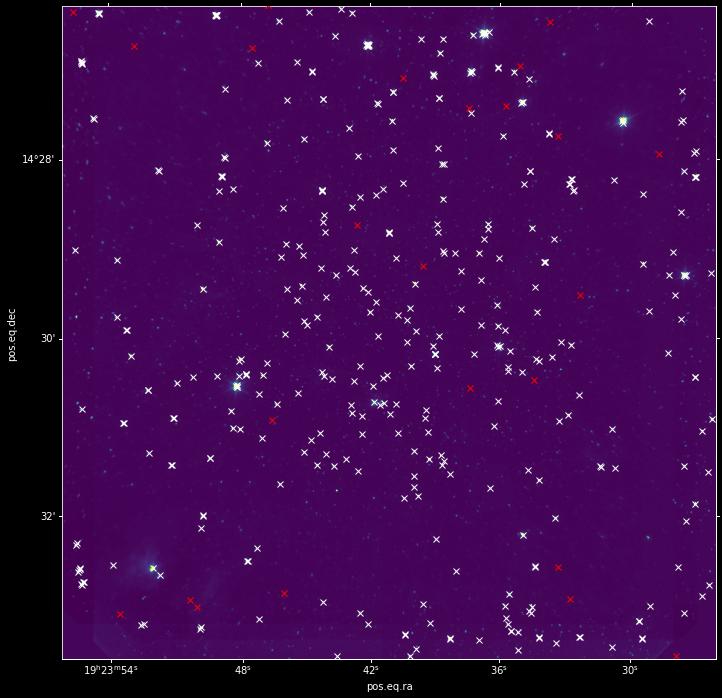

In [71]:
pl.figure(figsize=(12,12))
ax = pl.subplot(projection=ww)
pl.imshow(filehandle[0].data, norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99.9))
pl.plot(starcat['xcentroid'], starcat['ycentroid'], 'wx')
pl.plot(table_coordinates.ra[brightstars],
        table_coordinates.dec[brightstars],
        transform=ax.get_transform('world'), marker='x', color='r', linestyle='none')
ax.axis(axlims)

In [72]:
xc, yc = ww.all_world2pix(table_coordinates.ra, table_coordinates.dec, 0)

In [73]:
ra, dec = ww.all_pix2world(starcat['xcentroid'], starcat['ycentroid'], 0)*u.deg

In [74]:
starfind_coords = coordinates.SkyCoord(ra, dec, frame='fk5')

In [75]:
starfind_coords.shape, table_coordinates.shape

((393,), (1717,))

In [76]:
match_index, match_distance, _ = coordinates.match_coordinates_sky(starfind_coords, table_coordinates)

(array([27., 40., 75., 74., 69., 43., 40., 12.,  8.,  5.]),
 array([ 0.12587002,  1.63809362,  3.15031722,  4.66254082,  6.17476442,
         7.68698802,  9.19921163, 10.71143523, 12.22365883, 13.73588243,
        15.24810603]),
 <BarContainer object of 10 artists>)

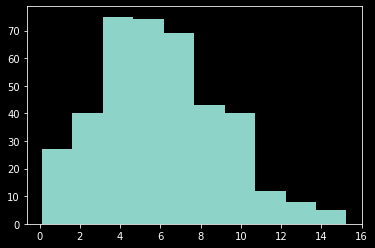

In [77]:
pl.hist(match_distance.to(u.arcsec).value)

In [78]:
new_sky_coordinates = table_coordinates[match_index]
new_sky_coordinates_xy = ww.all_world2pix(new_sky_coordinates.ra, new_sky_coordinates.dec, 0)

(-0.5, 2312.5, -0.5, 2309.5)

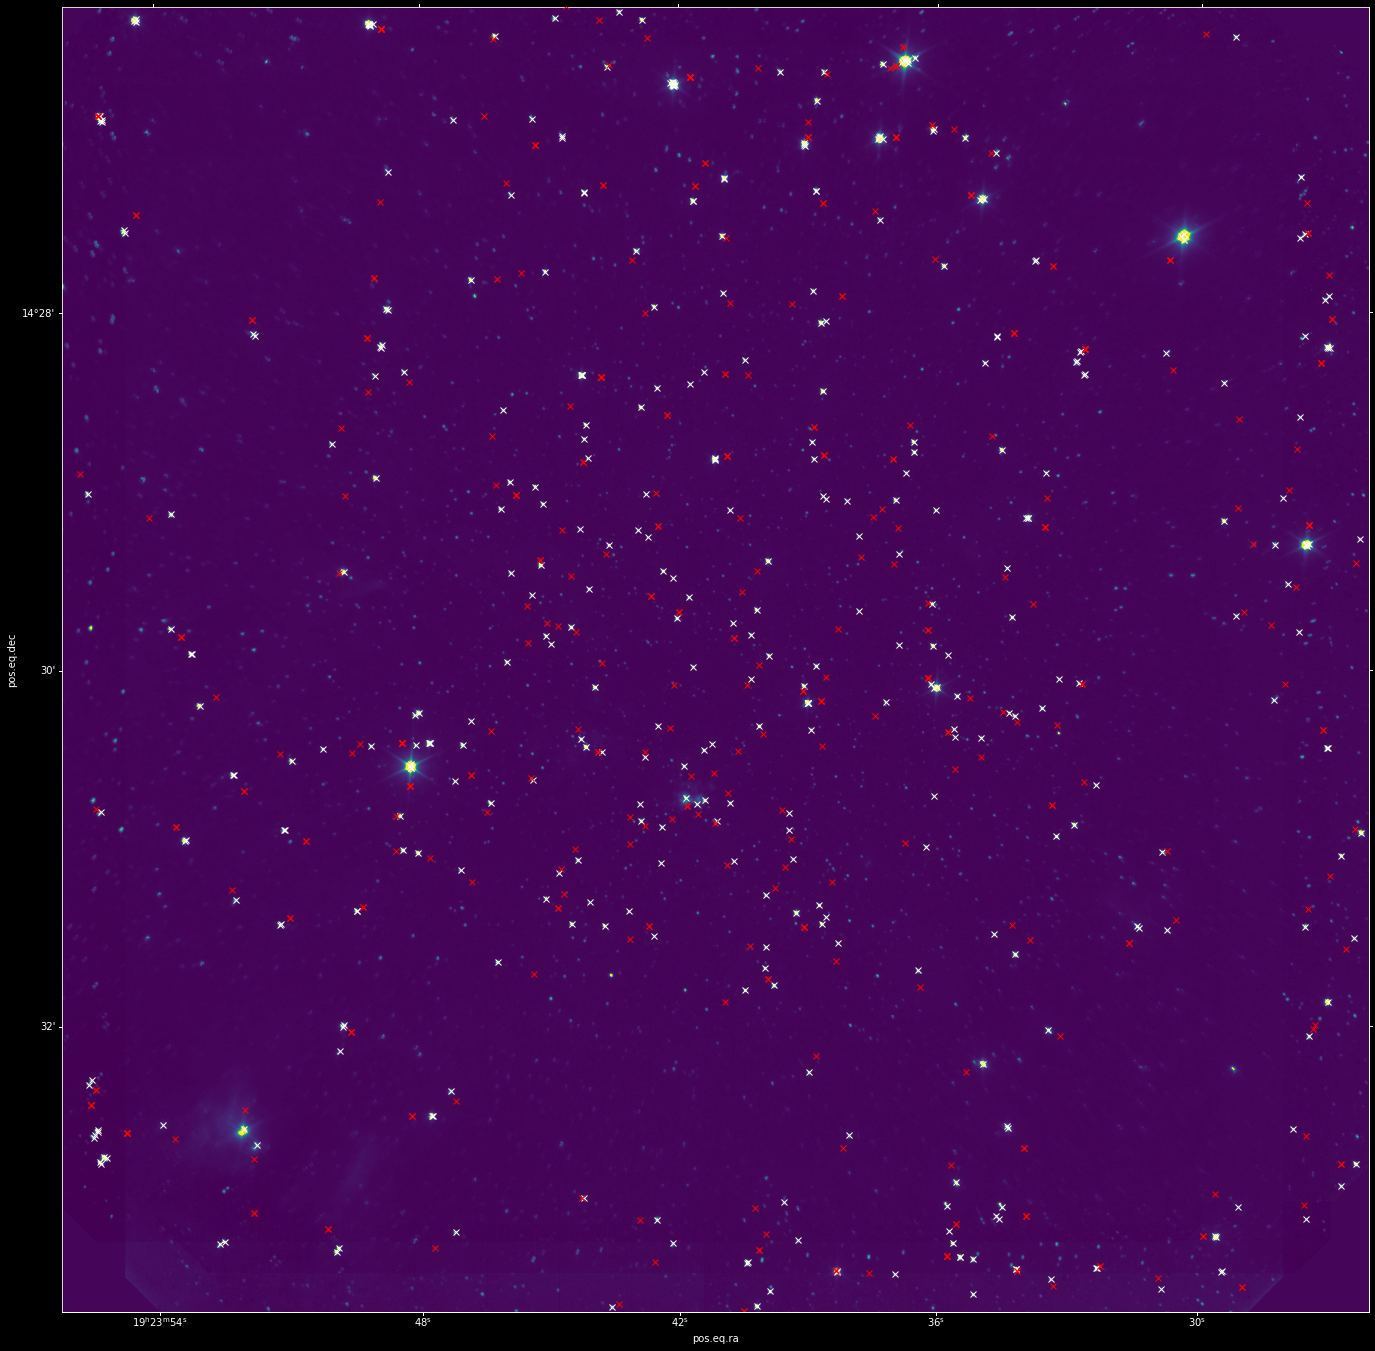

In [79]:
pl.figure(figsize=(24,24))
ax = pl.subplot(projection=ww)
pl.imshow(filehandle[0].data, norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99.9))
pl.plot(starcat['xcentroid'], starcat['ycentroid'], 'wx')
pl.plot(new_sky_coordinates_xy[0], new_sky_coordinates_xy[1], 'rx')
ax.axis(axlims)

In [80]:
from astropy.wcs.utils import fit_wcs_from_points

In [81]:
xy_starfind = np.array([starcat['xcentroid'], starcat['ycentroid']])

In [82]:
new_wcs = fit_wcs_from_points(xy_starfind, new_sky_coordinates, sip_degree=2)

In [83]:
new_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 290.9212007228643  14.499523106772857  
CRPIX : 1163.453355082908  1146.3196525127053  
CD1_1 CD1_2  : -5.301310084742831e-05  -2.3211931972992827e-07  
CD2_1 CD2_2  : 2.5839477096708644e-07  -5.3218119958602016e-05  
NAXIS : 2254.227795282294  2293.3091393311397

In [84]:
new_ra, new_dec = new_wcs.wcs_pix2world(starcat['xcentroid'], starcat['ycentroid'], 0)*u.deg

In [85]:
visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2add83f8c2b0>

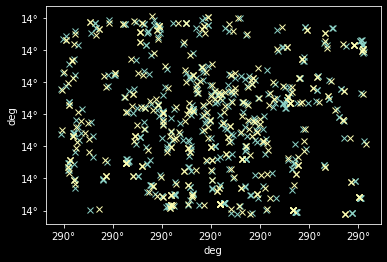

In [86]:
pl.plot(new_ra, new_dec, 'x')
pl.plot(new_sky_coordinates.ra, new_sky_coordinates.dec, 'x')

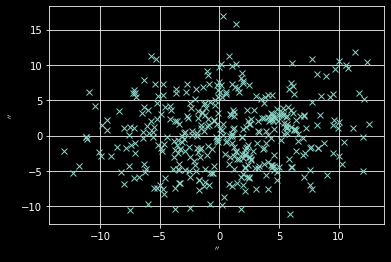

In [87]:
ra_residual = (new_ra-new_sky_coordinates.ra).to(u.arcsec)
dec_residual = (new_dec-new_sky_coordinates.dec).to(u.arcsec)
pl.plot(ra_residual, dec_residual, 'x')
pl.grid()

In [88]:
bad_matches = (ra_residual < -2*u.arcsec) | (ra_residual > 2*u.arcsec) | (dec_residual > 2*u.arcsec) | (dec_residual < -2*u.arcsec)
bad_matches.sum(), len(bad_matches)

(359, 393)

In [89]:
xy_starfind2 = xy_starfind.T[~bad_matches].T
new_sky_coordinates2 = new_sky_coordinates.T[~bad_matches].T
new_wcs2 = fit_wcs_from_points(xy_starfind2, new_sky_coordinates2, sip_degree=3)

In [90]:
new_ra2, new_dec2 = new_wcs2.wcs_pix2world(starcat['xcentroid'], starcat['ycentroid'], 0)*u.deg

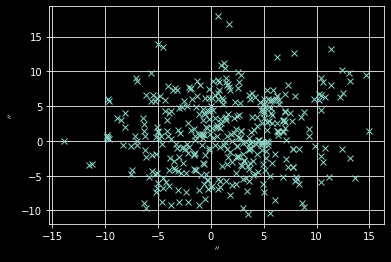

In [91]:
ra_residual2 = (new_ra2-new_sky_coordinates.ra).to(u.arcsec)
dec_residual2 = (new_dec2-new_sky_coordinates.dec).to(u.arcsec)
pl.plot(ra_residual2, dec_residual2, 'x')
pl.grid()

In [92]:
new_wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 290.91383468829963  14.499945173355767  
CRPIX : 1301.500176521902  1141.0481546416618  
CD1_1 CD1_2  : -5.323826150560652e-05  -4.494346326894094e-07  
CD2_1 CD2_2  : -4.949180272411248e-08  -5.2558110393181494e-05  
NAXIS : 1812.505110001052  2133.7443485592603

(-0.5, 2312.5, -0.5, 2309.5)

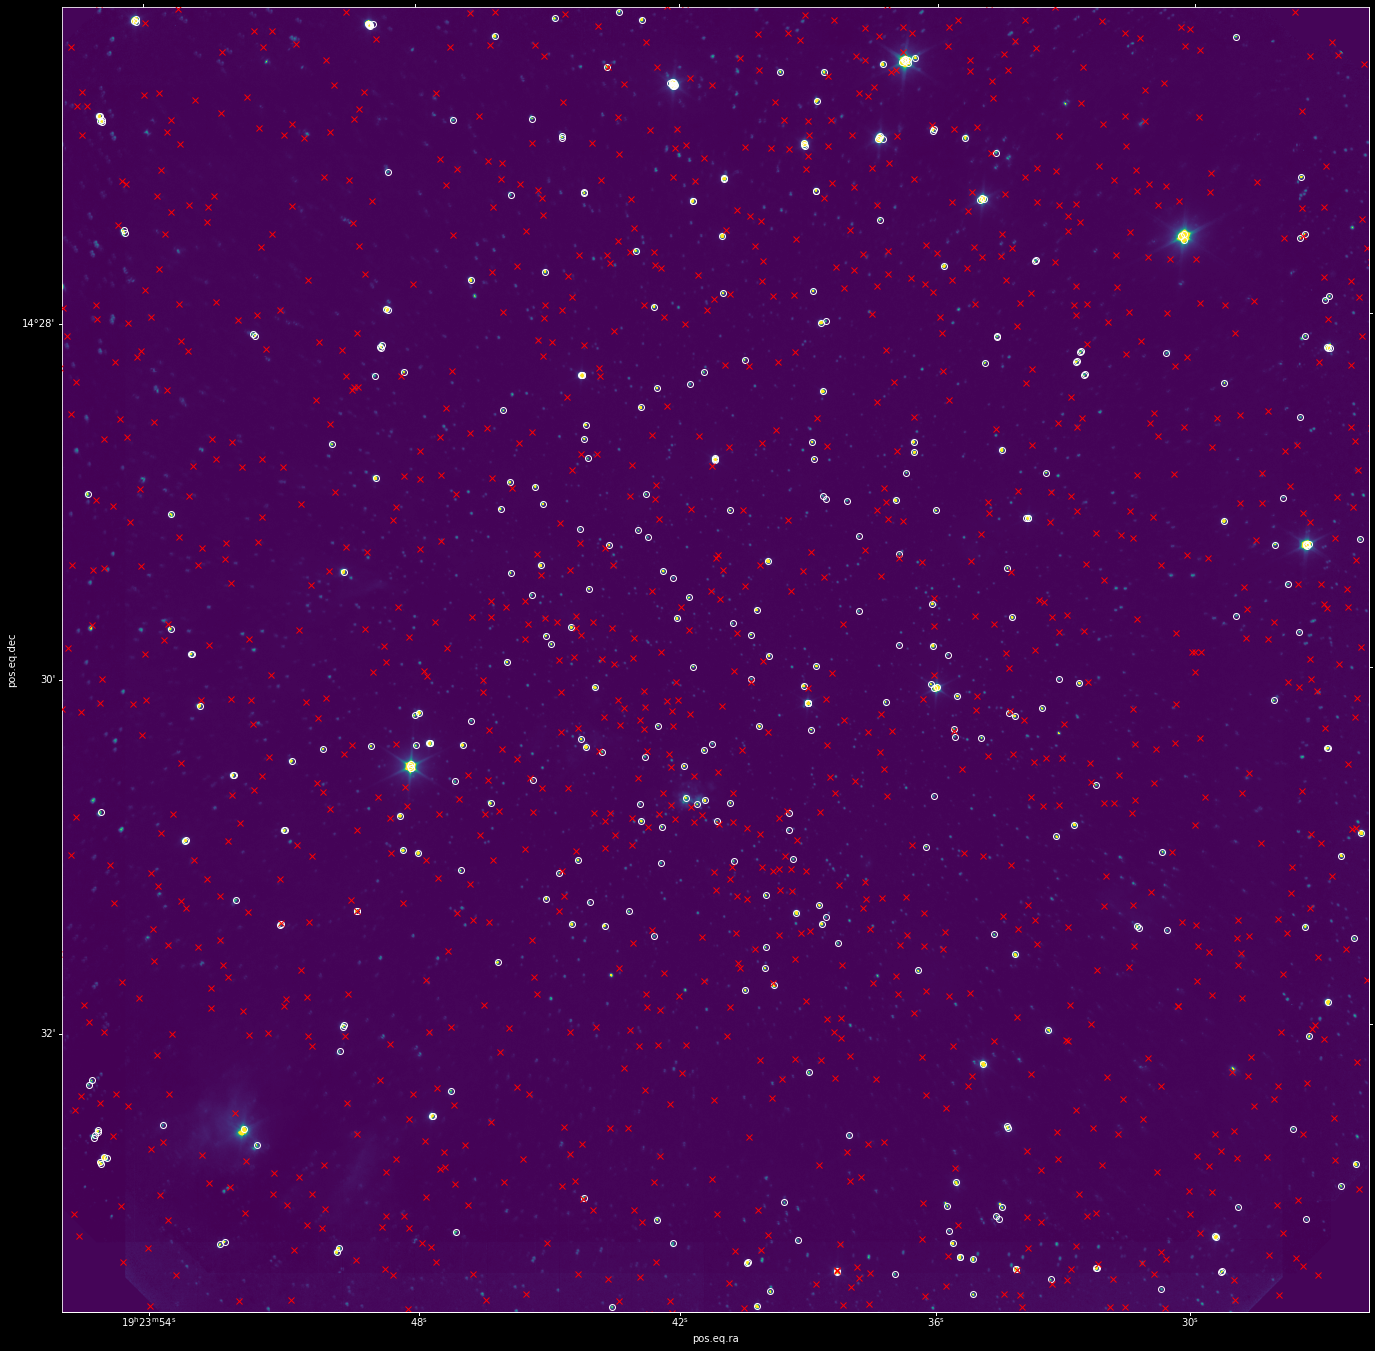

In [93]:
pl.figure(figsize=(24,24))
ax = pl.subplot(projection=new_wcs2)
pl.imshow(filehandle[0].data, norm=visualization.simple_norm(filehandle[0].data, min_percent=1, max_percent=99.9))
pl.plot(starcat['xcentroid'], starcat['ycentroid'], 'wo', markeredgecolor='w', markerfacecolor='none')
pl.plot(table_coordinates.ra,
        table_coordinates.dec,
        transform=ax.get_transform('world'), marker='x', color='r', linestyle='none')
ax.axis(axlims)

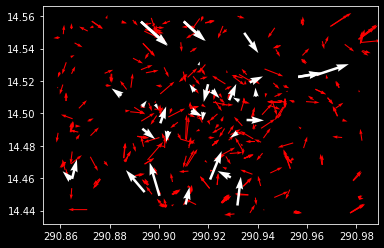

In [94]:
#per star shifts
#pl.quiver(new_ra.value, new_dec.value, ra_residual2.value, dec_residual2.value, color='w')
pl.quiver(new_ra.value[bad_matches], new_dec.value[bad_matches], ra_residual2.value[bad_matches], dec_residual2.value[bad_matches], color='r')
pl.quiver(new_ra.value[~bad_matches], new_dec.value[~bad_matches], ra_residual2.value[~bad_matches], dec_residual2.value[~bad_matches], color='w')

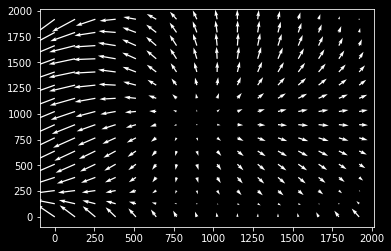

In [95]:
#distortion model in pixel coords
ygrid, xgrid = np.mgrid[0:2048:128, 0:2048:128]
r1,d1 = ww.all_pix2world(xgrid, ygrid, 0)
r2,d2 = new_wcs2.all_pix2world(xgrid, ygrid, 0)
pl.quiver(xgrid, ygrid, r2-r1, d2-d1, color='w')

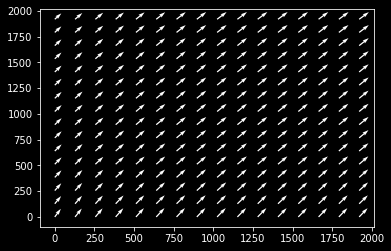

In [96]:
ygrid, xgrid = np.mgrid[0:2048:128, 0:2048:128]
# this doesn't do anything because the original "ww" didn't have SIP coefficients (x1 == xgrid exactly)
x1,y1 = ww.sip_pix2foc(xgrid, ygrid, 0)
# `sip_pix2foc` returns locations relative to crpix, so we redefine x1,x2 to be relative to crpix
x1,y1 = xgrid - ww.wcs.crpix[0], ygrid - ww.wcs.crpix[1]
x2,y2 = new_wcs2.sip_pix2foc(xgrid, ygrid, 0)
pl.quiver(xgrid, ygrid, x1-x2, y1-y2, color='w')